Iteration 1/1000, Best Fitness: 4.102705722973694
Iteration 2/1000, Best Fitness: 4.102705722973694
Iteration 3/1000, Best Fitness: 4.102705722973694
Iteration 4/1000, Best Fitness: 4.102705722973694
Iteration 5/1000, Best Fitness: 4.102705722973694
Iteration 6/1000, Best Fitness: 4.102705722973694
Iteration 7/1000, Best Fitness: 4.102705722973694
Iteration 8/1000, Best Fitness: 4.102705722973694
Iteration 9/1000, Best Fitness: 4.102705722973694
Iteration 10/1000, Best Fitness: 1.073006631283182
Iteration 11/1000, Best Fitness: 1.073006631283182
Iteration 12/1000, Best Fitness: 0.895722286020147
Iteration 13/1000, Best Fitness: 0.04135169664268787
Iteration 14/1000, Best Fitness: 0.04135169664268787
Iteration 15/1000, Best Fitness: 0.04135169664268787
Iteration 16/1000, Best Fitness: 0.04135169664268787
Iteration 17/1000, Best Fitness: 0.04135169664268787
Iteration 18/1000, Best Fitness: 0.04135169664268787
Iteration 19/1000, Best Fitness: 0.04135169664268787
Iteration 20/1000, Best Fi

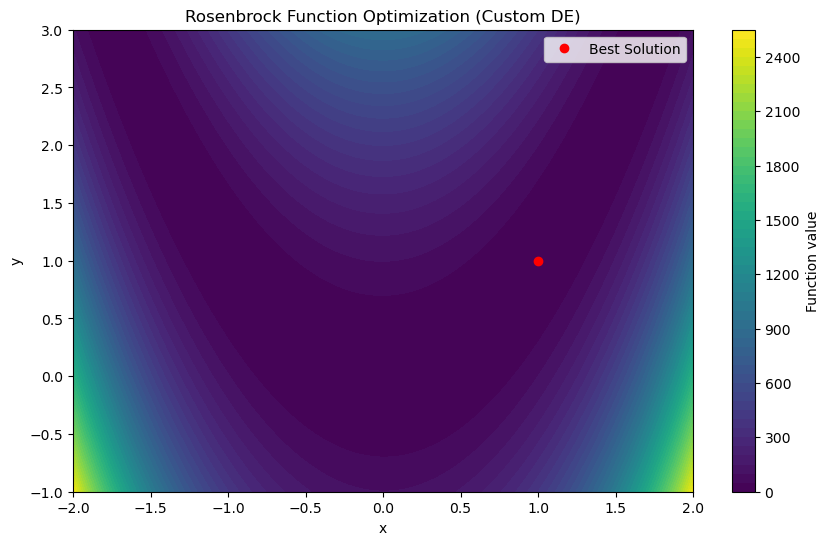

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock function definition
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

# Differential Evolution implementation
def differential_evolution(func, bounds, pop_size=20, max_iter=1000, F=0.8, CR=0.7):
    """
    Custom implementation of the Differential Evolution algorithm.

    Parameters:
        func: Function to minimize
        bounds: Bounds for variables as [(min, max), ...]
        pop_size: Size of the population
        max_iter: Maximum number of iterations
        F: Mutation factor
        CR: Crossover probability

    Returns:
        best_sol: Best solution found
        best_val: Function value at the best solution
    """
    # Initialize population
    dim = len(bounds)
    population = np.random.rand(pop_size, dim)
    for i in range(dim):
        population[:, i] = bounds[i][0] + population[:, i] * (bounds[i][1] - bounds[i][0])

    # Evaluate initial population
    fitness = np.array([func(ind) for ind in population])
    best_idx = np.argmin(fitness)
    best_sol = population[best_idx]

    for iteration in range(max_iter):
        for i in range(pop_size):
            # Mutation
            indices = [idx for idx in range(pop_size) if idx != i]
            a, b, c = population[np.random.choice(indices, 3, replace=False)]
            mutant = a + F * (b - c)
            mutant = np.clip(mutant, [b[0] for b in bounds], [b[1] for b in bounds])

            # Crossover
            crossover = np.random.rand(dim) < CR
            if not np.any(crossover):
                crossover[np.random.randint(0, dim)] = True
            trial = np.where(crossover, mutant, population[i])

            # Selection
            trial_fitness = func(trial)
            if trial_fitness < fitness[i]:
                population[i] = trial
                fitness[i] = trial_fitness

                # Update best solution
                if trial_fitness < fitness[best_idx]:
                    best_idx = i
                    best_sol = trial

        # Convergence check or progress display
        print(f"Iteration {iteration+1}/{max_iter}, Best Fitness: {fitness[best_idx]}")

    return best_sol, fitness[best_idx]

# Define bounds for the Rosenbrock function
bounds = [(-5, 5), (-5, 5)]

# Run the custom Differential Evolution algorithm
best_solution, best_value = differential_evolution(rosenbrock, bounds)

# Display results
print("Best Solution Found:", best_solution)
print("Function Value at Best Solution:", best_value)

# Visualization (optional)
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = 100 * (Y - X**2)**2 + (1 - X)**2

plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Function value')
plt.plot(best_solution[0], best_solution[1], 'ro', label='Best Solution')
plt.title('Rosenbrock Function Optimization (Custom DE)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [10]:
import numpy as np
def fx(x):
    return (x-3)**2
population = np.array([1,2,4])
print(f'Initial Population: {population}')

fitness = np.array([fx(x) for x in population])
print(f'Initial Fitness: {fitness}')

F = 0.8 # Mutation Factor
CR = 0.7 # Crossover probability

for i in range(len(population)):
    indices = [j for j in range(len(population)) if j != i]
    a,b = population[np.random.choice(indices, 2, replace=False)]
    mutant = b + F * (a - b)
    mutant = np.clip(mutant, 0, 5)
    print(f"\nTarget: {population[i]}, Mutant: {mutant}")
    if np.random.rand() < CR:
        trial = mutant
    else:
        trial = population[i]
    print(f"\nTrial Vector: {trial}")

    if fx(trial) < fx(population[i]):
        population[i] = trial
        print(f'Trial accepted')
    else:
        print(f"Trial rejected")
fitness = np.array([fx(x) for x in population])
print(f'Updated Population: {population}')
print(f'Updated Fitness: {fitness}')

Initial Population: [1 2 4]
Initial Fitness: [4 1 1]

Target: 1, Mutant: 3.6

Trial Vector: 3.6
Trial accepted

Target: 2, Mutant: 3.2

Trial Vector: 3.2
Trial accepted

Target: 4, Mutant: 3.0

Trial Vector: 3.0
Trial accepted
Updated Population: [3 3 3]
Updated Fitness: [0 0 0]


In [11]:
import matplotlib.pyplot as plt
import numpy as np

def rosenbrock(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

def initialize_population(bounds, pop_size):
    dim = len(bounds)
    population = np.random.rand(pop_size, dim)
    for i in range(dim):
        population[:, i] = bounds[i][0] + population[:, i] * (bounds[i][1] - bounds[i][0])
    return population

def mutate(population, idx, F, bounds):
    indices = [i for i in range(len(population)) if i != idx]
    a,b,c = population[np.random.choice(indices, 3, replace=False)]
    mutant = a + F * (b - c)
    mutant = np.clip(mutant, [b[0] for b in bounds], [b[1] for b in bounds])
    return mutant

def crossover(target, mutant, CR=0.7):
    dim = len(target)
    crossover = np.random.rand(dim) < CR
    if not np.any(crossover):
        crossover[np.random.randint(0, dim)] = True
    trial  = np.where(crossover, mutant, target)
    return trial
def select(target, trial, func):
    if func(trial) < func(target):
        return trial
    else:
        return target

def differential_evolution(func, bounds, pop_size=20, max_iter=1000, CR=0.7, F=0.8):
    dim = len(bounds)
    population = initialize_population(bounds, pop_size)
    fitness = np.array([func(ind) for ind in population])
    best_idx = np.argmin(fitness)
    best_sol = population[best_idx]

    for iteration in range(max_iter):
        for i in range(pop_size):
            mutant = mutate(population, i, F, bounds)
            trial = crossover(population[i], mutant, CR)
            population[i] = select(population[i], trial, func)

        # Update the best solution
        fitness = np.array([func(ind) for ind in population])
        best_idx = np.argmin(fitness)
        best_sol = population[best_idx]

        # Log progress
        print(f"Iteration {iteration+1}/{max_iter}, Best Fitness: {fitness[best_idx]}")

    return best_sol, fitness[best_idx]

bounds = [(-5, 5), (-5, 5)]

# Run Differential Evolution
best_solution, best_value = differential_evolution(rosenbrock, bounds)

# Step 8: Display results
print("Best Solution Found:", best_solution)
print("Function Value at Best Solution:", best_value)


Iteration 1/1000, Best Fitness: 7.326073507049378
Iteration 2/1000, Best Fitness: 7.326073507049378
Iteration 3/1000, Best Fitness: 7.326073507049378
Iteration 4/1000, Best Fitness: 7.326073507049378
Iteration 5/1000, Best Fitness: 7.326073507049378
Iteration 6/1000, Best Fitness: 4.374340061225744
Iteration 7/1000, Best Fitness: 4.374340061225744
Iteration 8/1000, Best Fitness: 0.8831233578815424
Iteration 9/1000, Best Fitness: 0.8831233578815424
Iteration 10/1000, Best Fitness: 0.8831233578815424
Iteration 11/1000, Best Fitness: 0.4954590801020814
Iteration 12/1000, Best Fitness: 0.4954590801020814
Iteration 13/1000, Best Fitness: 0.4954590801020814
Iteration 14/1000, Best Fitness: 0.4954590801020814
Iteration 15/1000, Best Fitness: 0.4954590801020814
Iteration 16/1000, Best Fitness: 0.4954590801020814
Iteration 17/1000, Best Fitness: 0.4954590801020814
Iteration 18/1000, Best Fitness: 0.14637932184453473
Iteration 19/1000, Best Fitness: 0.14637932184453473
Iteration 20/1000, Best Fi

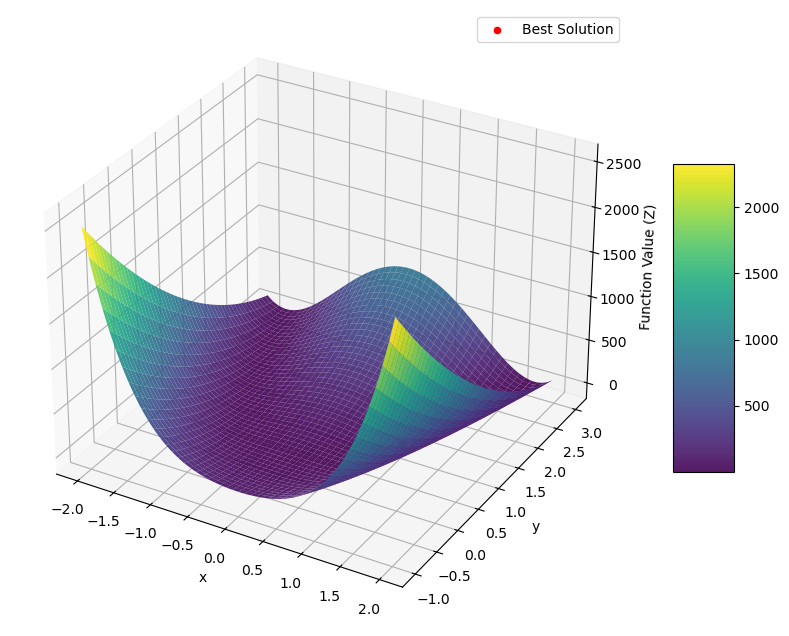

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def rosenbrock(X, Y):
    return 100 * (Y - X**2)**2 + (1 - X)**2

x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)
best_solution = [1,1]
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.9)
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
ax.scatter(best_solution[0], best_solution[1],rosenbrock(best_solution[0],best_solution[1])
           ,c='r', label='Best Solution')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Function Value (Z)')
ax.legend()
plt.show()

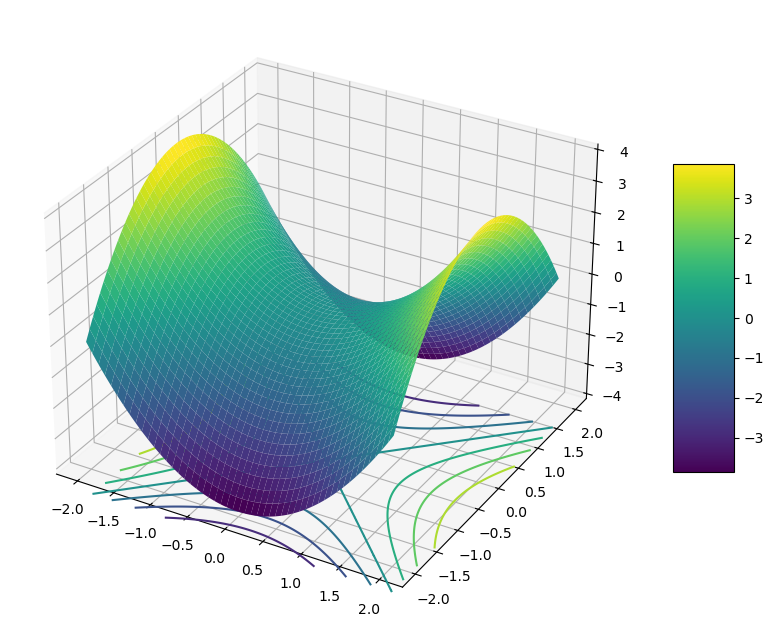

In [32]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-2,2,400)
X, Y = np.meshgrid(x, y)
Z = X**2 - Y**2
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
contour = ax.contour(X, Y, Z, cmap='viridis', offset=-5,)
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
plt.show()

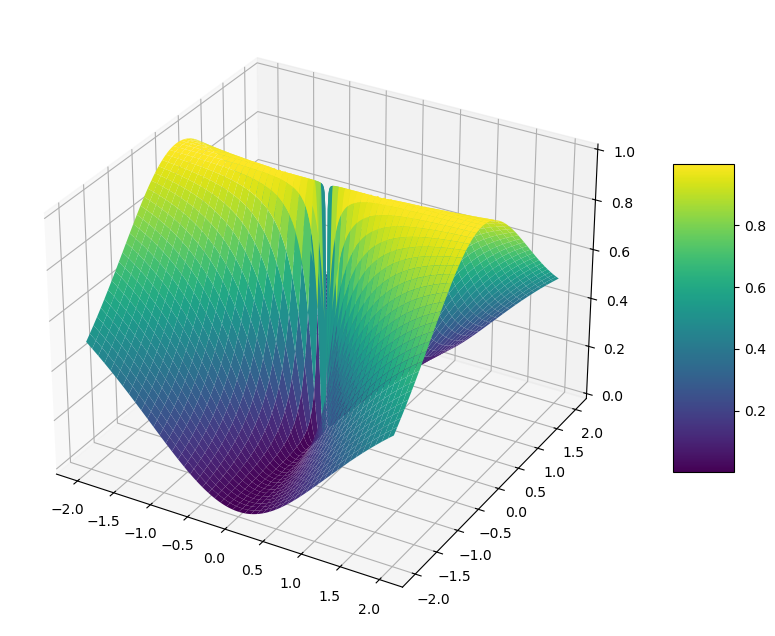

In [31]:
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = (X**2) / (X**2 + Y**2 )
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
plt.show()